In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4317,ham,S...i will take mokka players only:),NaN,NaN,NaN
4243,ham,"Aight, I'm chillin in a friend's room so text ...",NaN,NaN,NaN
1903,spam,Free entry in 2 a weekly comp for a chance to ...,NaN,NaN,NaN
4363,ham,So what about you. What do you remember,NaN,NaN,NaN
2565,ham,I told her I had a Dr appt next week. She thin...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   v1          5572 non-null   str  
 1   v2          5572 non-null   str  
 2   Unnamed: 2  50 non-null     str  
 3   Unnamed: 3  12 non-null     str  
 4   Unnamed: 4  6 non-null      str  
dtypes: str(5)
memory usage: 217.8 KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [8]:
# Missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# Check for duplicate values

df.duplicated().sum()

np.int64(403)

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

# 2. EDA

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

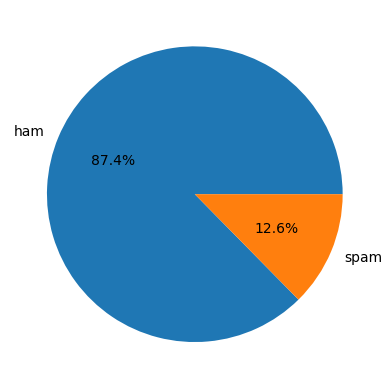

In [16]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [17]:
# Since data is imbalanced, we will use stratified sampling while splitting the data

In [18]:
import nltk

In [19]:
nltk.download('punkt_tab', quiet=True)

True

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words'] = df['text'].apply(lambda x: nltk.word_tokenize(x)).apply(len)

In [23]:
df['num_sentences'] = df['text'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)

In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


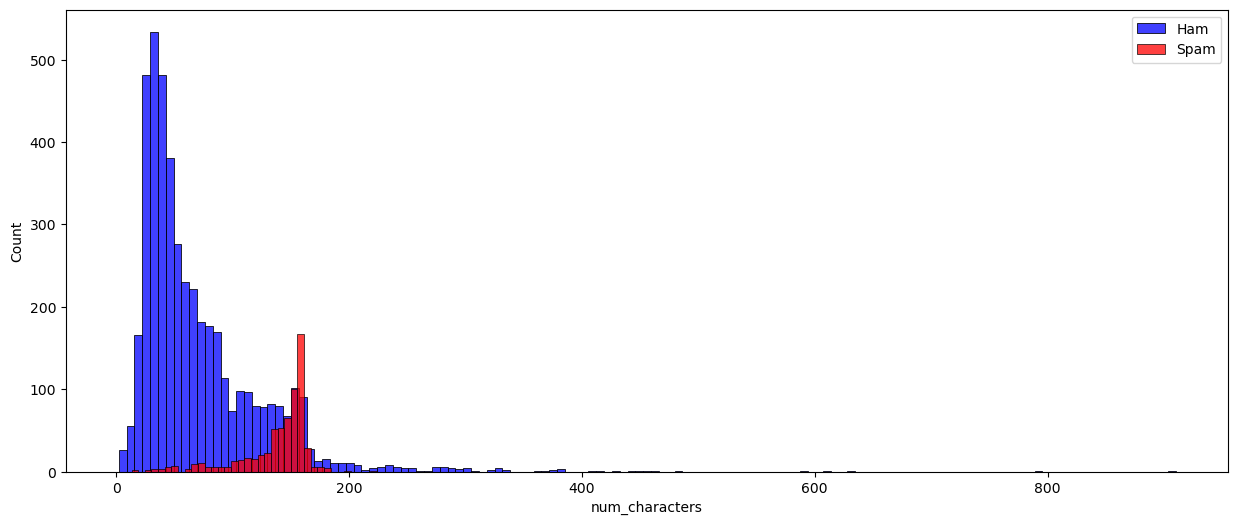

In [26]:
# Histograms
plt.figure(figsize=(15, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam')
plt.legend()
plt.show()

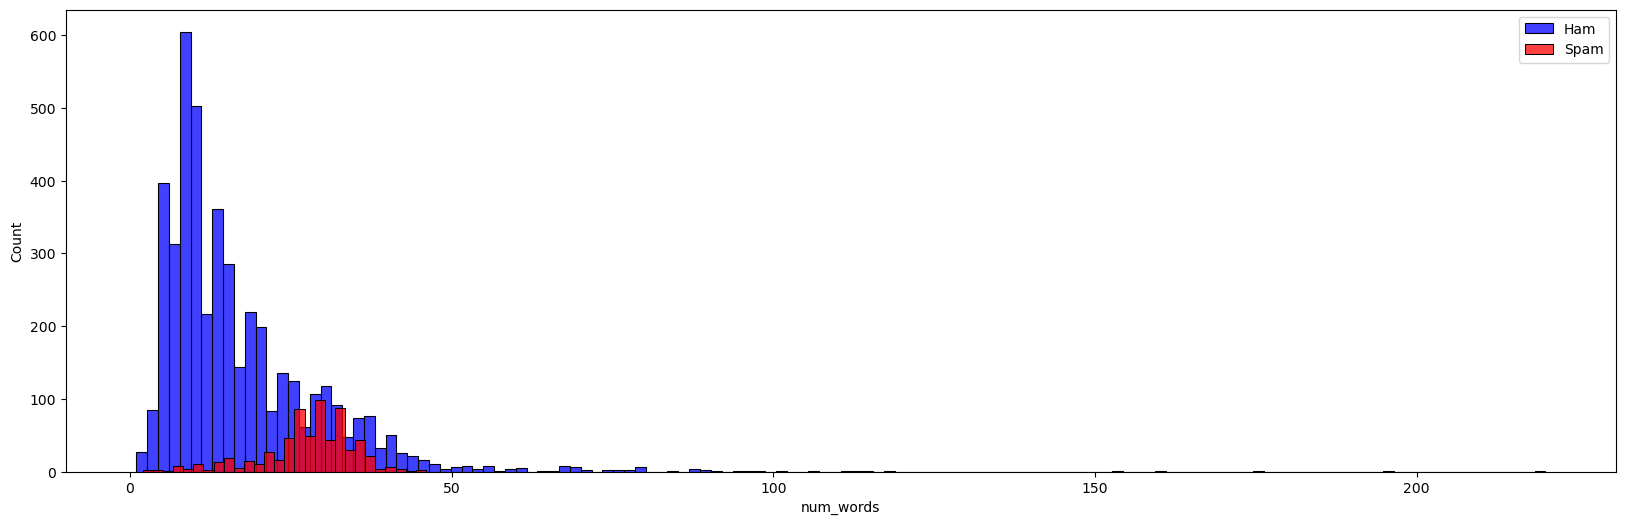

In [27]:
# Histograms
plt.figure(figsize=(20, 6))
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam')
plt.legend()
plt.show()

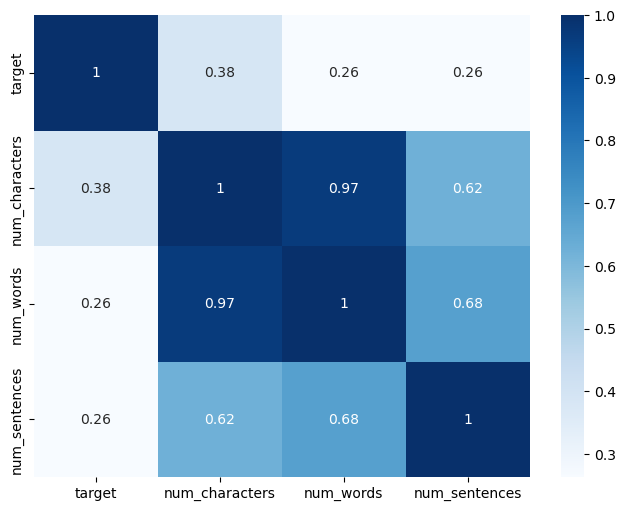

In [28]:
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

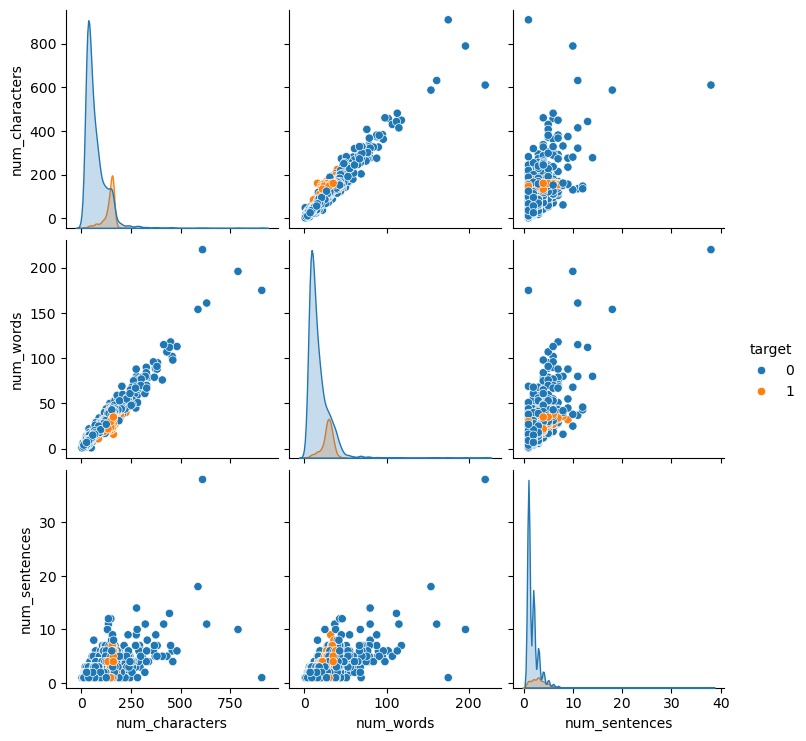

In [29]:
sns.pairplot(df, hue='target')
plt.show()

In [30]:
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /Users/mbp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return " ".join([
        ps.stem(token) 
        for token in tokens 
        if token.isalnum() and token not in stop_words and token not in string.punctuation 
    ])


In [32]:
transform_text('can you come to the epstein island tommorrow? loving dancing %')

'come epstein island tommorrow love danc'

In [33]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: str

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
!pip install wordcloud

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [38]:
spam = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

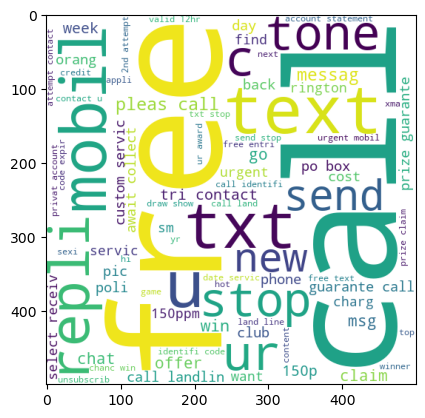

In [39]:
plt.imshow(spam)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
df[df['target'] == 1]['transformed_text'].head(10)

2     free entri 2 wkli comp win fa cup final tkt 21...
5     freemsg hey darl 3 week word back like fun sti...
8     winner valu network custom select receivea pri...
9     mobil 11 month u r entitl updat latest colour ...
11    six chanc win cash 100 pound txt csh11 send co...
12    urgent 1 week free membership prize jackpot tx...
15    xxxmobilemovieclub use credit click wap link n...
19    england v macedonia dont miss news txt ur nati...
34    thank subscript rington uk mobil charg pleas c...
42    07732584351 rodger burn msg tri call repli sm ...
Name: transformed_text, dtype: str

In [42]:
spam_corpus = []
spam_words_list = df[df['target'] == 1]['transformed_text'].tolist()

for text in spam_words_list:
    for word in text.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

In [44]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


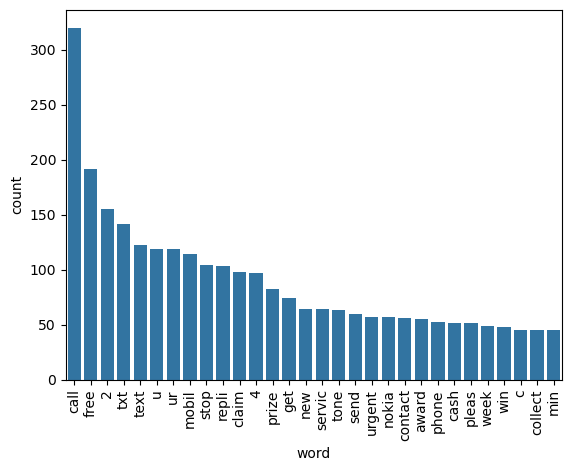

In [45]:
sns.barplot(x='word', y='count', data=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count']))
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus = []
ham_words_list = df[df['target'] == 0]['transformed_text'].tolist()

for text in ham_words_list:
    for word in text.split():
        ham_corpus.append(word)

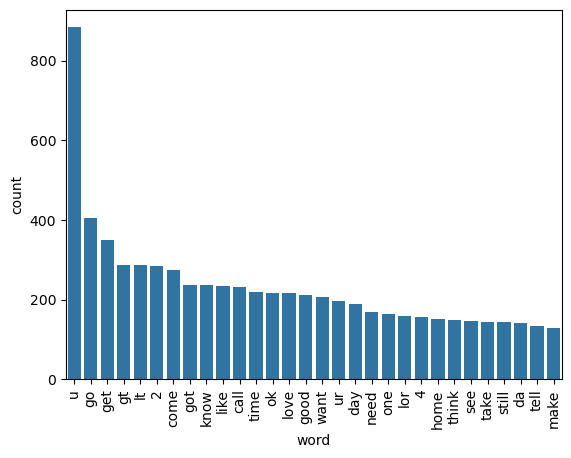

In [47]:
sns.barplot(x='word', y='count', data=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count']))
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [147]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
cv = TfidfVectorizer(max_features=3000)

In [157]:
# Split data for training
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

Train samples: 4135, Test samples: 1034


In [138]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [139]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [117]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_gnb))
print("Precision Score:", precision_score(y_test, y_pred_gnb))
print("Confusion Matrix", confusion_matrix(y_test, y_pred_gnb))

Accuracy Score: 0.8694390715667312
Precision Score: 0.5068493150684932
Confusion Matrix [[788 108]
 [ 27 111]]


In [118]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_mnb))
print("Precision Score:", precision_score(y_test, y_pred_mnb))
print("Confusion Matrix", confusion_matrix(y_test, y_pred_mnb))

Accuracy Score: 0.9709864603481625
Precision Score: 1.0
Confusion Matrix [[896   0]
 [ 30 108]]


In [103]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_bnb))
print("Precision Score:", precision_score(y_test, y_pred_bnb))
print("Confusion Matrix", confusion_matrix(y_test, y_pred_bnb))

Accuracy Score: 0.9700193423597679
Precision Score: 0.9734513274336283
Confusion Matrix [[893   3]
 [ 28 110]]


In [104]:
!pip install xgboost

# 5. Model Improvement

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [141]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
xgbc = XGBClassifier(n_estimators=50, random_state=2)

In [142]:
clfs = {
    'SVC': svc,
    'KNC': knc,
    'MNB': mnb,
    'DTC': dtc,
    'RFC': rfc,
    'ABC': abc,
    'GBC': gbc,
    'ETC': etc,
    'BC': bc,
    'XGBC': xgbc
}

In [143]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [109]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [144]:
# --- Reusable function to run all classifiers and return results ---
def run_all_classifiers(clfs, X_train, y_train, X_test, y_test):
    """Train all classifiers and return a dict with model names as keys 
    and (accuracy, precision) as values"""
    results = {}
    for name, clf in clfs.items():
        accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        results[name] = (accuracy, precision)
        print(f"{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}")
    return results

In [145]:
# Dictionary to store results from all experiments
# Key = experiment name, Value = dict of {model_name: (accuracy, precision)}
all_experiments = {}

# --- Experiment 1: Original (default TfidfVectorizer) ---
print("=== Experiment: original ===")
all_experiments['original'] = run_all_classifiers(clfs, X_train, y_train, X_test, y_test)

=== Experiment: original ===
SVC: Accuracy=0.9729, Precision=0.9741
KNC: Accuracy=0.9004, Precision=1.0000
MNB: Accuracy=0.9594, Precision=1.0000
DTC: Accuracy=0.9371, Precision=0.8544
RFC: Accuracy=0.9720, Precision=1.0000
ABC: Accuracy=0.9246, Precision=0.8409
GBC: Accuracy=0.9516, Precision=0.9231
ETC: Accuracy=0.9729, Precision=0.9825
BC: Accuracy=0.9584, Precision=0.8626
XGBC: Accuracy=0.9749, Precision=0.9516


In [150]:
# --- Experiment 2: TfidfVectorizer with max_features=3000 ---
# (Re-using same X_train, X_test since cv was already set to max_features=3000)
print("=== Experiment: max_ft_3000 ===")
all_experiments['max_ft_3000'] = run_all_classifiers(clfs, X_train, y_train, X_test, y_test)

=== Experiment: max_ft_3000 ===
SVC: Accuracy=0.9758, Precision=0.9748
KNC: Accuracy=0.9052, Precision=1.0000
MNB: Accuracy=0.9710, Precision=1.0000
DTC: Accuracy=0.9304, Precision=0.8173
RFC: Accuracy=0.9758, Precision=0.9829
ABC: Accuracy=0.9246, Precision=0.8488
GBC: Accuracy=0.9468, Precision=0.9192
ETC: Accuracy=0.9749, Precision=0.9746
BC: Accuracy=0.9584, Precision=0.8682
XGBC: Accuracy=0.9671, Precision=0.9483


In [151]:
# --- Helper function to build comparison dataframe from all experiments ---
def build_comparison_df(all_experiments):
    """Takes the all_experiments dict and builds a single comparison DataFrame.
    Each experiment adds Accuracy_<name> and Precision_<name> columns."""
    
    # Get model names from first experiment
    model_names = list(list(all_experiments.values())[0].keys())
    
    comparison = pd.DataFrame({'Model': model_names})
    
    for exp_name, results in all_experiments.items():
        comparison[f'Accuracy_{exp_name}'] = [results[m][0] for m in model_names]
        comparison[f'Precision_{exp_name}'] = [results[m][1] for m in model_names]
    
    # Sort by the last experiment's precision
    last_exp = list(all_experiments.keys())[-1]
    return comparison.sort_values(by=f'Precision_{last_exp}', ascending=False)

# Build and display comparison so far
comparison_df = build_comparison_df(all_experiments)
comparison_df

,Model,Accuracy_original,Precision_original,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KNC,0.900387,1.000000,0.905222,1.000000
2,MNB,0.959381,1.000000,0.970986,1.000000
4,RFC,0.971954,1.000000,0.975822,0.982906
0,SVC,0.972921,0.974138,0.975822,0.974790
7,ETC,0.972921,0.982456,0.974855,0.974576
9,XGBC,0.974855,0.951613,0.967118,0.948276
6,GBC,0.951644,0.923077,0.946809,0.919192
8,BC,0.958414,0.862595,0.958414,0.868217
5,ABC,0.924565,0.840909,0.924565,0.848837
3,DTC,0.937137,0.854369,0.930368,0.817308


### 2. Lets try with scaling the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2
)

print("=== Experiment: minmax_scaled ===")
all_experiments['minmax_scaled'] = run_all_classifiers(
    clfs, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled
)

=== Experiment: minmax_scaled ===
SVC: Accuracy=0.9691, Precision=0.9274
KNC: Accuracy=0.9052, Precision=0.9762
MNB: Accuracy=0.9787, Precision=0.9462
DTC: Accuracy=0.9275, Precision=0.8119
RFC: Accuracy=0.9758, Precision=0.9829
ABC: Accuracy=0.9246, Precision=0.8488
GBC: Accuracy=0.9468, Precision=0.9192
ETC: Accuracy=0.9749, Precision=0.9746
BC: Accuracy=0.9584, Precision=0.8682
XGBC: Accuracy=0.9671, Precision=0.9483


In [ ]:
comparison_df = build_comparison_df(all_experiments)
comparison_df

,Model,Accuracy_original,Precision_original,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_minmax_scaled,Precision_minmax_scaled
4,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
1,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
7,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
9,XGBC,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276
2,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
0,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
6,GBC,0.951644,0.923077,0.946809,0.919192,0.946809,0.919192
8,BC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
5,ABC,0.924565,0.840909,0.924565,0.848837,0.924565,0.848837
3,DTC,0.937137,0.854369,0.930368,0.817308,0.927466,0.811881


In [155]:
###############################################
# It means scaling the features did not improve the performance of the models. 
# In fact, it seems to have slightly decreased the precision for most models. 
# This suggests that for this particular dataset and feature representation (TF-IDF), scaling may not be necessary or beneficial. 
# However, it's always good to experiment with different preprocessing techniques as their impact can vary based on the data and model used.
###############################################

### 3. Lets try with adding more features like num_characters, num_words, num_sentences to the original X and see if it improves the performance of the models.

In [158]:
X_nc = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))

In [159]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_nc, y, test_size=0.2, random_state=2
)

print("=== Experiment: adding num_characters ===")
all_experiments['num_characters'] = run_all_classifiers(
    clfs, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled
)

=== Experiment: adding num_characters ===


/opt/anaconda3/envs/sms-spam-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


SVC: Accuracy=0.8665, Precision=0.0000
KNC: Accuracy=0.9342, Precision=0.8302
MNB: Accuracy=0.9410, Precision=1.0000
DTC: Accuracy=0.9449, Precision=0.8857
RFC: Accuracy=0.9691, Precision=0.9818
ABC: Accuracy=0.9468, Precision=0.9029
GBC: Accuracy=0.9507, Precision=0.9307
ETC: Accuracy=0.9787, Precision=0.9754
BC: Accuracy=0.9662, Precision=0.8992
XGBC: Accuracy=0.9700, Precision=0.9496


In [160]:
comparison_df = build_comparison_df(all_experiments)
comparison_df

,Model,Accuracy_original,Precision_original,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_minmax_scaled,Precision_minmax_scaled,Accuracy_num_characters,Precision_num_characters
2,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
4,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
7,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
9,XGBC,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276,0.970019,0.949580
6,GBC,0.951644,0.923077,0.946809,0.919192,0.946809,0.919192,0.950677,0.930693
5,ABC,0.924565,0.840909,0.924565,0.848837,0.924565,0.848837,0.946809,0.902913
8,BC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225
3,DTC,0.937137,0.854369,0.930368,0.817308,0.927466,0.811881,0.944874,0.885714
1,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.934236,0.830189
0,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000


In [161]:
X_nw = np.hstack((X, df['num_words'].values.reshape(-1, 1)))

In [162]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_nw, y, test_size=0.2, random_state=2
)

print("=== Experiment: adding num_words ===")
all_experiments['num_words'] = run_all_classifiers(
    clfs, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled
)

=== Experiment: adding num_words ===


/opt/anaconda3/envs/sms-spam-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


SVC: Accuracy=0.8665, Precision=0.0000
KNC: Accuracy=0.9429, Precision=0.8376
MNB: Accuracy=0.9429, Precision=1.0000
DTC: Accuracy=0.9304, Precision=0.8000
RFC: Accuracy=0.9710, Precision=0.9737
ABC: Accuracy=0.9313, Precision=0.8526
GBC: Accuracy=0.9487, Precision=0.9208
ETC: Accuracy=0.9807, Precision=0.9836
BC: Accuracy=0.9555, Precision=0.8485
XGBC: Accuracy=0.9662, Precision=0.9558


In [163]:
comparison_df = build_comparison_df(all_experiments)
comparison_df

,Model,Accuracy_original,Precision_original,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_minmax_scaled,Precision_minmax_scaled,Accuracy_num_characters,Precision_num_characters,Accuracy_num_words,Precision_num_words
2,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000,0.942940,1.000000
7,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410,0.980658,0.983607
4,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818,0.970986,0.973684
9,XGBC,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276,0.970019,0.949580,0.966151,0.955752
6,GBC,0.951644,0.923077,0.946809,0.919192,0.946809,0.919192,0.950677,0.930693,0.948743,0.920792
5,ABC,0.924565,0.840909,0.924565,0.848837,0.924565,0.848837,0.946809,0.902913,0.931335,0.852632
8,BC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225,0.955513,0.848485
1,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.934236,0.830189,0.942940,0.837607
3,DTC,0.937137,0.854369,0.930368,0.817308,0.927466,0.811881,0.944874,0.885714,0.930368,0.800000
0,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000,0.866538,0.000000
